In [1]:
# Importing the required libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing the data in Python Environment.
data = pd.read_csv("311_Service_Requests_from_2010_to_Present.csv")
data.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


### Exploratory Data Analysis -

In [3]:
data.shape

(300698, 53)

- The dataset is huge and has 53 features.

In [4]:
data.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [5]:
data.isnull().any().sum()

35

- There are 35 columns having missing values.

Let's see how many missing values we have in each column -

In [6]:
missing_cols = data.columns[data.isnull().any()]
missing_cols

Index(['Closed Date', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Due Date',
       'Resolution Action Updated Date', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'School Region', 'School Code',
       'School Zip', 'School or Citywide Complaint', 'Vehicle Type',
       'Taxi Company Borough', 'Taxi Pick Up Location', 'Bridge Highway Name',
       'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment',
       'Garage Lot Name', 'Ferry Direction', 'Ferry Terminal Name', 'Latitude',
       'Longitude', 'Location'],
      dtype='object')

In [7]:
# Creating a dict with missing_cols as keys.
# And percentage of missing values as values.
d = {}
for i in missing_cols:
    ratio = (data[i].isnull().sum()) / len(data)
    d[i] = round(ratio*100, 2) 
d        

{'Closed Date': 0.72,
 'Descriptor': 1.97,
 'Location Type': 0.04,
 'Incident Zip': 0.87,
 'Incident Address': 14.77,
 'Street Name': 14.77,
 'Cross Street 1': 16.39,
 'Cross Street 2': 16.55,
 'Intersection Street 1': 85.41,
 'Intersection Street 2': 85.58,
 'Address Type': 0.94,
 'City': 0.87,
 'Landmark': 99.88,
 'Facility Type': 0.72,
 'Due Date': 0.0,
 'Resolution Action Updated Date': 0.73,
 'X Coordinate (State Plane)': 1.18,
 'Y Coordinate (State Plane)': 1.18,
 'School Region': 0.0,
 'School Code': 0.0,
 'School Zip': 0.0,
 'School or Citywide Complaint': 100.0,
 'Vehicle Type': 100.0,
 'Taxi Company Borough': 100.0,
 'Taxi Pick Up Location': 100.0,
 'Bridge Highway Name': 99.92,
 'Bridge Highway Direction': 99.92,
 'Road Ramp': 99.93,
 'Bridge Highway Segment': 99.93,
 'Garage Lot Name': 100.0,
 'Ferry Direction': 100.0,
 'Ferry Terminal Name': 100.0,
 'Latitude': 1.18,
 'Longitude': 1.18,
 'Location': 1.18}

- We can see there are some columns having 100% null values.
- We can simply drop columns having more than 50% missing values.
- As imputing that much values would result in bias.

In [8]:
cols_to_drop = []
for i in d.keys():
    if d[i] > 50 :
        cols_to_drop.append(i)
print('Total number of columns : ',len(cols_to_drop))
print(cols_to_drop)        

Total number of columns :  14
['Intersection Street 1', 'Intersection Street 2', 'Landmark', 'School or Citywide Complaint', 'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location', 'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment', 'Garage Lot Name', 'Ferry Direction', 'Ferry Terminal Name']


- We have 14 columns having more than 50% missing values.

Let's drop them -

In [9]:
# Creating a copy of original df and dropping columns.
df = data.copy()
df.drop(cols_to_drop,axis=1,inplace=True)
df.shape

(300698, 39)

- We can see the columns have been dropped.

In [10]:
rest_missing_cols = [x for x in missing_cols if x in df.columns]
print(rest_missing_cols)

['Closed Date', 'Descriptor', 'Location Type', 'Incident Zip', 'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2', 'Address Type', 'City', 'Facility Type', 'Due Date', 'Resolution Action Updated Date', 'X Coordinate (State Plane)', 'Y Coordinate (State Plane)', 'School Region', 'School Code', 'School Zip', 'Latitude', 'Longitude', 'Location']


- For the rest of missing columns, the information like date, location, Address, Zip are very **precise** and hence imputing them with any measure **won't** be a good option. 
- We will use nan features of numpy if neeeded for analysis.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 39 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      300698 non-null  int64  
 1   Created Date                    300698 non-null  object 
 2   Closed Date                     298534 non-null  object 
 3   Agency                          300698 non-null  object 
 4   Agency Name                     300698 non-null  object 
 5   Complaint Type                  300698 non-null  object 
 6   Descriptor                      294784 non-null  object 
 7   Location Type                   300567 non-null  object 
 8   Incident Zip                    298083 non-null  float64
 9   Incident Address                256288 non-null  object 
 10  Street Name                     256288 non-null  object 
 11  Cross Street 1                  251419 non-null  object 
 12  Cross Street 2  

- The columns *Created Date, Closed Date* and *Resolution Action Updated Date* are of object data type.
- We need to convert these to pandas **datetime** format.

In [12]:
df['Created Date'] = pd.to_datetime(df['Created Date'])
df['Closed Date'] = pd.to_datetime(df['Closed Date'])
df['Resolution Action Updated Date'] = pd.to_datetime(df['Resolution Action Updated Date'])

Let's verify -

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 39 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Unique Key                      300698 non-null  int64         
 1   Created Date                    300698 non-null  datetime64[ns]
 2   Closed Date                     298534 non-null  datetime64[ns]
 3   Agency                          300698 non-null  object        
 4   Agency Name                     300698 non-null  object        
 5   Complaint Type                  300698 non-null  object        
 6   Descriptor                      294784 non-null  object        
 7   Location Type                   300567 non-null  object        
 8   Incident Zip                    298083 non-null  float64       
 9   Incident Address                256288 non-null  object        
 10  Street Name                     256288 non-null  object 

### Major Insights 

Since the data is about complaints, let's look for major complaint types -

In [14]:
df['Complaint Type'].value_counts(sort=True)

Blocked Driveway             77044
Illegal Parking              75361
Noise - Street/Sidewalk      48612
Noise - Commercial           35577
Derelict Vehicle             17718
Noise - Vehicle              17083
Animal Abuse                  7778
Traffic                       4498
Homeless Encampment           4416
Noise - Park                  4042
Vending                       3802
Drinking                      1280
Noise - House of Worship       931
Posting Advertisement          650
Urinating in Public            592
Bike/Roller/Skate Chronic      427
Panhandling                    307
Disorderly Youth               286
Illegal Fireworks              168
Graffiti                       113
Agency Issues                    6
Squeegee                         4
Ferry Complaint                  2
Animal in a Park                 1
Name: Complaint Type, dtype: int64

Let's have a look on most frequent and least frequent *Complaint Type* -

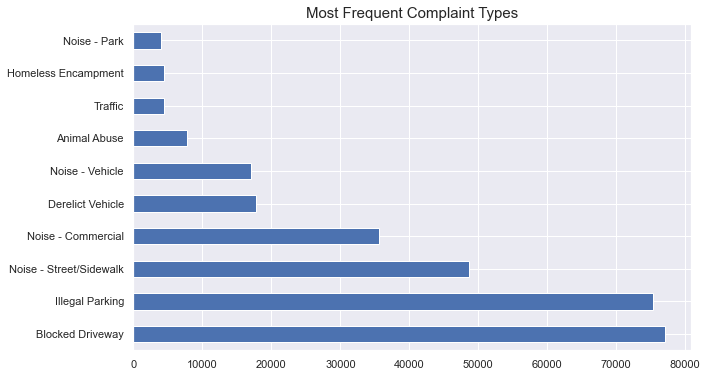

In [15]:
# Most frequent Complaint Type.
plt.figure(figsize=(10,6))
df['Complaint Type'].value_counts(sort=True)[:10].plot(kind='barh')
plt.title('Most Frequent Complaint Types', fontsize=15)
plt.show()

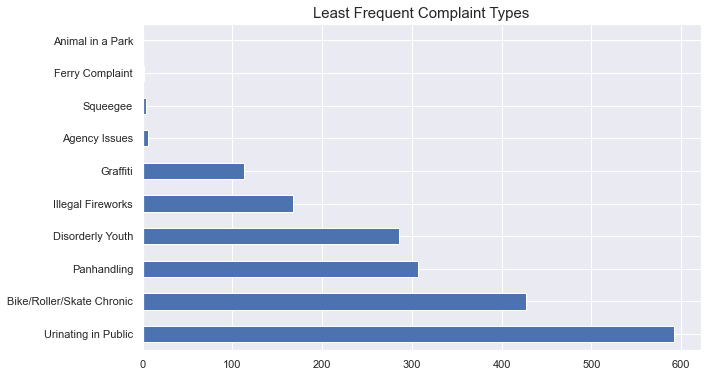

In [16]:
# Least frequent Complaint Type.
plt.figure(figsize=(10,6))
df['Complaint Type'].value_counts(sort=True)[-10:].plot(kind='barh')
plt.title('Least Frequent Complaint Types', fontsize=15)
plt.show()

- Most of the complaints were of *Blocked Driveway* followed by *illegal driving*.
- Least complaints were related to *Animal in a park* and *Ferry Complaint*.

Now, Let's have a look on complaints specifying the community board - 

In [17]:
df['Borough'].value_counts()

BROOKLYN         98307
QUEENS           80641
MANHATTAN        66131
BRONX            40702
STATEN ISLAND    12343
Unspecified       2574
Name: Borough, dtype: int64

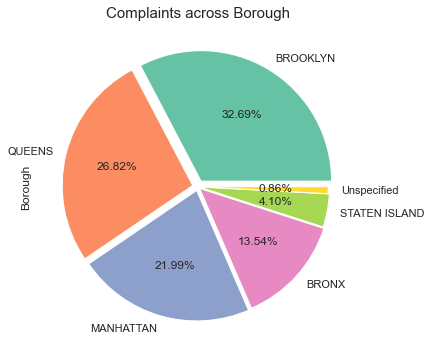

In [18]:
df['Borough'].value_counts().plot(kind='pie',autopct='%0.2f%%',
                                  colors=sns.color_palette('Set2'),
                                  explode=[0.05,0.04,0.03,0.02,0.01,0],
                                  figsize=(10,6))
plt.title("Complaints across Borough", fontsize=15)
plt.show()

Let's explore the location types from where complaints were received -

In [19]:
df['Location Type'].value_counts(sort=True)

Street/Sidewalk               249299
Store/Commercial               20381
Club/Bar/Restaurant            17360
Residential Building/House      6960
Park/Playground                 4773
House of Worship                 929
Residential Building             227
Highway                          215
Parking Lot                      117
House and Store                   93
Vacant Lot                        77
Commercial                        62
Roadway Tunnel                    35
Subway Station                    34
Bridge                             2
Terminal                           1
Ferry                              1
Park                               1
Name: Location Type, dtype: int64

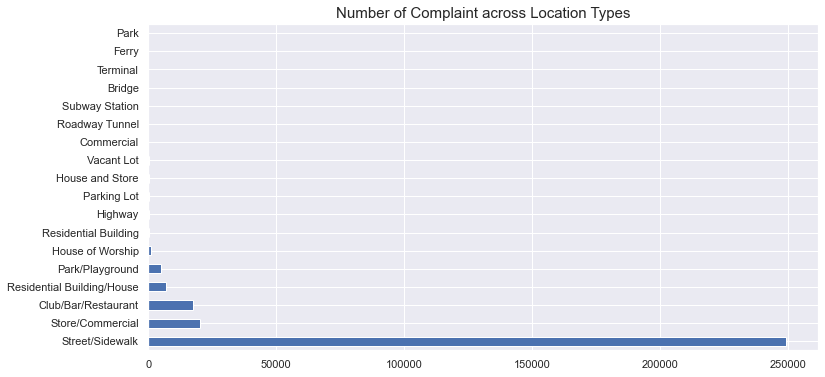

In [20]:
# Visualizing the above
plt.figure(figsize=(12,6))
df['Location Type'].value_counts(sort=True).plot(kind='barh')
plt.title('Number of Complaint across Location Types', fontsize=15)
plt.show()

- *Street/SideWalk* is the location from where maximum complaints were received.
- Only 1 complain was received from *Park, ferry* and *terminal*.

Let's see month-wise complaints -

In [21]:
# Creating a new variabe to extract month.
df['Month'] = df['Created Date'].dt.month
df['Month'].value_counts()

5     36437
9     35427
6     35315
8     34956
7     34888
10    32605
11    30773
12    30521
4     27305
3      2471
Name: Month, dtype: int64

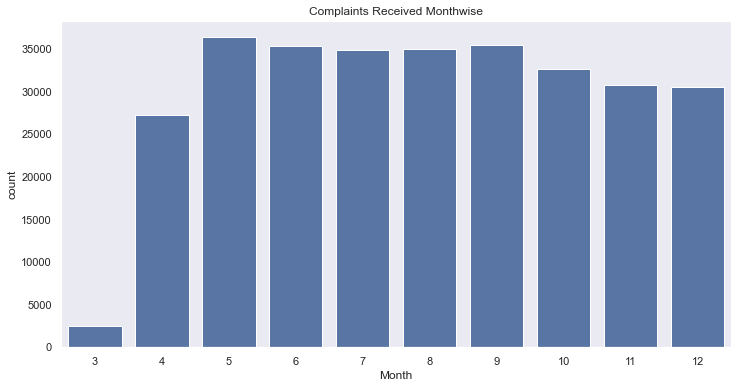

In [22]:
plt.figure(figsize=(12,6))
sns.countplot(x='Month', data=df, color='b')
plt.title('Complaints Received Monthwise')
plt.grid(axis='y')
plt.show()

- The highest number of complaints were received in the Month of *May*.
- The least number of complaints were received in the Month of *March*.

### Create a new column ‘Request_Closing_Time’ as the time elapsed between request creation and request closing.

In [23]:
df['Request_Closing_Time'] = df['Closed Date'] - df['Created Date']
df['Request_Closing_Time']

0        0 days 00:55:15
1        0 days 01:26:16
2        0 days 04:51:31
3        0 days 07:45:14
4        0 days 03:27:02
               ...      
300693               NaT
300694   0 days 02:00:31
300695   0 days 03:07:17
300696   0 days 04:05:33
300697   0 days 04:08:49
Name: Request_Closing_Time, Length: 300698, dtype: timedelta64[ns]

- What we got is time duration including days,hours,minutes and seconds.
- It would be more suitable if we convert them into minutes.

In [24]:
df['Request_Closing_Time'] = df['Request_Closing_Time'].dt.seconds / 60
df['Request_Closing_Time']

0          55.250000
1          86.266667
2         291.516667
3         465.233333
4         207.033333
             ...    
300693           NaN
300694    120.516667
300695    187.283333
300696    245.550000
300697    248.816667
Name: Request_Closing_Time, Length: 300698, dtype: float64

### Order the complaint types based on the average ‘Request_Closing_Time’, grouping them for different locations.

In [25]:
groups = df.groupby(['Location Type','Complaint Type']) ['Request_Closing_Time'] .mean()
groups_df = pd.DataFrame(groups.sort_values()) # Sorting in ascending order.
groups_df['Request_Closing_Time'] = round(groups_df['Request_Closing_Time'], 2)
groups_df.dropna(inplace=True) # Removing null values

In [26]:
groups_df

,,Request_Closing_Time
Location Type,Complaint Type,
Park,Animal in a Park,50.08
Subway Station,Urinating in Public,69.13
Park/Playground,Panhandling,73.12
Street/Sidewalk,Posting Advertisement,106.66
Store/Commercial,Illegal Fireworks,115.45
...,...,...
Residential Building/House,Panhandling,309.93
Store/Commercial,Graffiti,333.64
Street/Sidewalk,Derelict Vehicle,335.81


- The average request closing time is **lowest** for complaint type *'Derelict Vehicle'* for the location *'Highway'* and at same time **highest** for location *'Roadway Tunnel'*.
- *'Graffiti'* complaints took longer time for any of the locations.
- *'Highway', 'Street', 'Store', 'Park'* or *'Club'* seems to be top-priority location for complaints resolution.

# Whether the average response time across complaint types is similar or not (overall) ?

- For this we will test the **hypothesis**.
- The question asked is about means difference across multiple groups.
- For this, we have to do one-way **Analysis of Variance test**.

Let's first see how means are different from each other -

In [27]:
# Creating a subset of data excluding missing value record.
anova_data = df[['Complaint Type','Request_Closing_Time']].dropna() 
anova_data.head()

,Complaint Type,Request_Closing_Time
0,Noise - Street/Sidewalk,55.250000
1,Blocked Driveway,86.266667
2,Blocked Driveway,291.516667
3,Illegal Parking,465.233333
4,Illegal Parking,207.033333


In [28]:
# Checking mean for each Complaint Type.
anova_data.groupby('Complaint Type').mean()

,Request_Closing_Time
Complaint Type,
Agency Issues,315.619444
Animal Abuse,277.573208
Animal in a Park,50.083333
Bike/Roller/Skate Chronic,212.402830
Blocked Driveway,263.082093
Derelict Vehicle,335.330298
Disorderly Youth,208.480070
Drinking,217.027621
Graffiti,339.871534


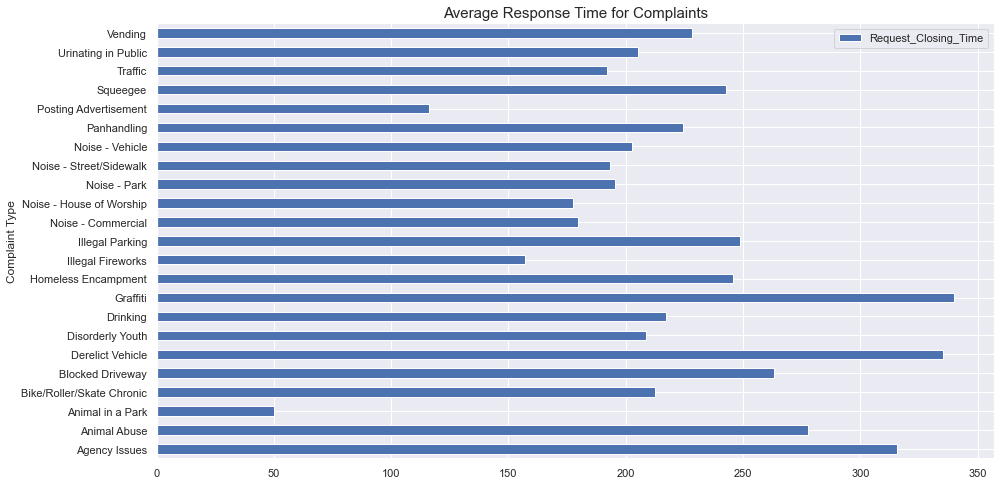

In [29]:
# Let's visualize it
anova_data.groupby('Complaint Type').mean().plot(kind='barh',
                                                figsize=(15,8))
plt.title('Average Response Time for Complaints', fontsize=15)
plt.show()

- From above it seems average response time are not similar.

Let's do a statistical test to present the evidence -

- **$H_0$ (Null Hypothesis)** : The average response time across complaint types are similar.
- **$H_1$(Alternate Hypothesis)** : The average response time across complaint types are not similar.
- The test statistcs is $F_{statistics}$
- Significance level  **($\alpha$) =0.05**

# $F_{statistics} = \frac{(SSB / dof_{ssb})}{(SSW/dof_{ssw})}$

In [30]:
# Checking the sample sizes.
print(anova_data['Complaint Type'].value_counts())
print('\nNumber Of Groups = ',
      anova_data['Complaint Type'].nunique())

Blocked Driveway             76810
Illegal Parking              74532
Noise - Street/Sidewalk      48076
Noise - Commercial           35247
Derelict Vehicle             17588
Noise - Vehicle              17033
Animal Abuse                  7768
Traffic                       4496
Homeless Encampment           4416
Noise - Park                  4022
Vending                       3795
Drinking                      1275
Noise - House of Worship       929
Posting Advertisement          648
Urinating in Public            592
Bike/Roller/Skate Chronic      424
Panhandling                    305
Disorderly Youth               286
Illegal Fireworks              168
Graffiti                       113
Agency Issues                    6
Squeegee                         4
Animal in a Park                 1
Name: Complaint Type, dtype: int64

Number Of Groups =  23


- We can see for some of them, sample sizes(n) are very **small**.
- We have 23 groups(k) ,thus we have to remove wherever $n-k < 0$.
- We will remove *Agency Issues, Squeegee* and *Animal in a Park*.

In [31]:
cond_1 = anova_data['Complaint Type'] != 'Agency Issues'
cond_2 = anova_data['Complaint Type'] != 'Squeegee'
cond_3 = anova_data['Complaint Type'] != 'Animal in a Park'
filter_anova_data = anova_data[cond_1 & cond_2 & cond_3]
filter_anova_data['Complaint Type'].unique()

array(['Noise - Street/Sidewalk', 'Blocked Driveway', 'Illegal Parking',
       'Derelict Vehicle', 'Noise - Commercial',
       'Noise - House of Worship', 'Posting Advertisement',
       'Noise - Vehicle', 'Animal Abuse', 'Vending', 'Traffic',
       'Drinking', 'Bike/Roller/Skate Chronic', 'Panhandling',
       'Noise - Park', 'Homeless Encampment', 'Urinating in Public',
       'Graffiti', 'Disorderly Youth', 'Illegal Fireworks'], dtype=object)

- We can see the recording belonging to group of small sample sizes has been dropped.

Let's calculate 
- SST = sum of squares total
- SSW = sum of squares within
- SSB = sum of squares between

#### SST

In [32]:
mean_response_time = filter_anova_data['Request_Closing_Time'].mean()
print("Mean response time for all requests (in min) -")
print(mean_response_time)

Mean response time for all requests (in min) -
235.7627208512125


In [33]:
SST = np.sum(np.square(filter_anova_data['Request_Closing_Time']
                      - mean_response_time))
SST

16015178971.036877

#### SSW

In [34]:
# Creating a helping function.
def sum_of_squares(group):
    return np.sum(np.square(group-group.mean()))

In [35]:
ss_grp =[]
dof_grp =[]
no_of_groups = list(filter_anova_data['Complaint Type'].unique())
grp_data = filter_anova_data.groupby('Complaint Type')

for i in no_of_groups:
    grp_values = grp_data.get_group(i)['Request_Closing_Time']
    SSW_grp = sum_of_squares(grp_values) # Using the function.
    ss_grp.append(SSW_grp)
    dof_grp.append(len(grp_values)-1)
    
SSW = sum(ss_grp)
dof_ssw = sum(dof_grp)
print('SSW = ',SSW)
print('degrees of freedom =',dof_ssw)

SSW =  15508483830.93968
degrees of freedom = 298503


#### SSB

In [36]:
SSB = SST-SSW
SSB

506695140.0971966

In [37]:
dof_ssb = len(no_of_groups)-1
dof_ssb

19

#### F- statistics

In [38]:
f = (SSB/dof_ssb) / (SSW/dof_ssw)
f

513.3014564063357

Let's calculate the p-value of f-statistics -

In [39]:
from scipy import stats
f_dist = stats.f
cdf = f_dist.cdf(f,dof_ssb,dof_ssw)
p_val = 1 - cdf
p_val

1.1102230246251565e-16

In [40]:
p_val < 0.05

True

- The F statistic falls under critical region.
- The p_value < $\alpha$.
- We reject the Null Hypothesis.

### Conclusion : The average response time across complaint types are not similar.

--------------------------------------------------------------------------------------------------------------------------------

# Are the type of complaint or service requested and location related?

- The question asked is about assosciation of two categorical data.
- We have to do **chi-squared test**.

Let's have a look on required data -

In [41]:
chi_sq_data =df[['Unique Key','Complaint Type','Location Type']]
chi_sq_data.head()

,Unique Key,Complaint Type,Location Type
0,32310363,Noise - Street/Sidewalk,Street/Sidewalk
1,32309934,Blocked Driveway,Street/Sidewalk
2,32309159,Blocked Driveway,Street/Sidewalk
3,32305098,Illegal Parking,Street/Sidewalk
4,32306529,Illegal Parking,Street/Sidewalk


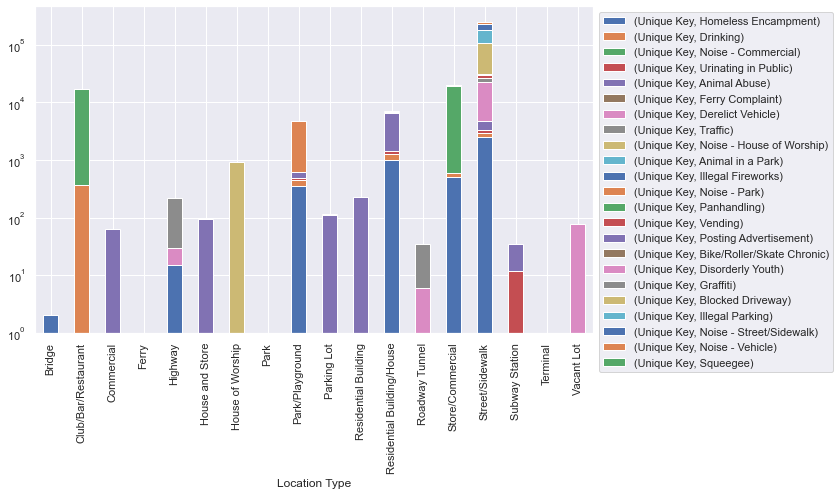

In [42]:
# Visualizing the frequency of grouped data.
grp_chi_sq_data = chi_sq_data.groupby(['Location Type','Complaint Type']).count()
fig,ax = plt.subplots(figsize=(10,6))
fig = grp_chi_sq_data.unstack().plot(kind='bar',
                                     stacked=True,
                                     ax=ax)
fig.legend(bbox_to_anchor=[1,1])
plt.yscale('log')

- From above, we can't say for sure that complaint type and location type are related or not.


Let's test above hypothesis -

- **$H_0$ (Null Hypothesis)** : The location type and complaint type are not related.
- **$H_1$(Alternate Hypothesis)** : The location type and complaint type are related..
- The test statistcs is $x^2_{chi-square}$
- Significance level  **($\alpha$) =0.05**

In [43]:
chi_sq_table = pd.crosstab(df['Location Type'],df['Complaint Type'],
                             margins=True,
                             margins_name='Total')

In [44]:
chi_sq_table

Complaint Type,Animal Abuse,Animal in a Park,Bike/Roller/Skate Chronic,Blocked Driveway,Derelict Vehicle,Disorderly Youth,Drinking,Ferry Complaint,Graffiti,Homeless Encampment,...,Noise - Park,Noise - Street/Sidewalk,Noise - Vehicle,Panhandling,Posting Advertisement,Squeegee,Traffic,Urinating in Public,Vending,Total
Location Type,,,,,,,,,,,,,,,,,,,,,
Bridge,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,2
Club/Bar/Restaurant,0,0,0,0,0,0,366,0,0,0,...,0,0,0,0,0,0,0,21,0,17360
Commercial,62,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,62
Ferry,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
Highway,0,0,0,0,14,0,0,0,0,15,...,0,0,0,0,0,0,186,0,0,215
House and Store,93,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,93
House of Worship,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,929
Park,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Park/Playground,123,0,0,0,0,0,98,0,0,353,...,4041,0,0,6,0,0,0,38,106,4773


### $ChiSquare = \frac{\sum (f_e - f_o)^2} { f_e} $

Let's calculate expected values -

In [45]:
# Total number of samples
N = chi_sq_table.iloc[-1,-1]
N

300567

In [46]:
rows, cols = chi_sq_table.shape
print('Number of rows = ',rows)
print('Number of columns = ',cols)

Number of rows =  19
Number of columns =  24


In [47]:
# Creating Expexted Table
E = np.zeros((rows-1, cols-1)) # Excluding margins.
for i in range(rows-1):
    for j in range(cols-1):
        E[i,j] = (chi_sq_table.iloc[-1,j] * chi_sq_table.iloc[i,-1])/ N 
E.shape                

(18, 23)

In [48]:
# Observed values.
O = chi_sq_table.iloc[:-1,:-1].values # Converting to numpy array.
O.shape

(18, 23)

In [49]:
def chi_square_values(expected,observed):
    return (np.square(expected-observed)) / expected

In [50]:
n_rows, n_cols = O.shape
chi_square_val = 0
for i in range(n_rows):
    for j in range(n_cols):
        val = chi_square_values(E[i,j], O[i,j])
        chi_square_val += val
        
print('Chi-square value',chi_square_val)        

Chi-square value 1638407.580569628


In [51]:
# Calculating degrees of freedom.
dof_chi_square = (n_cols-1) * (n_rows-1)
dof_chi_square

374

In [52]:
# Calculating p-value.
cdf_chi_square = stats.chi2.cdf(chi_square_val,dof_chi_square)
p_value = 1- cdf_chi_square
p_value

0.0

In [53]:
p_value < 0.05

True

- The p_value < $\alpha$.
- We reject the Null Hypothesis.

### Conclusion : The location type and complaint type are related.